# Dataset D1 - WGS E.coli


## Importing libraries

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as tkr

## Data reading and cleaning

In [18]:
data = pd.read_csv('../summary_data/D1_WGS_E.coli_summary.csv')
data['total_corrections'] = data['Base - TP']+ data['Base - FP']

## Defining color dictionary

In [19]:
color_dict=dict({'Bfc':'purple','Bless':'orange','Coral':'brown','Fiona':'gray','Lighter':'pink','Musket':'blue','Pollux':'yellow','Racer':'green','Reckoner':'red','Sga':'black'})

## Selecting best kmer for each tool

In [20]:
data_best = data.loc[data.groupby(["Tool","Coverage"])["Base Gain"].idxmax()] 

<br>
<br>

# Figure 2g

Heatmap depicting the gain across various coverage settings.<br>
Each row corresponds to an error correction tool, and each column corresponds to a dataset with a given coverage.
<br>For each tool, the best k-mer size was selected.

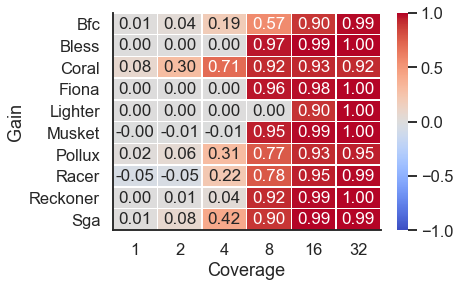

In [21]:
result = data_best.pivot(index='Tool', columns='Coverage', values='Base Gain') \
    .sort_values(by="Tool", ascending=False)

sns.set_style("white")
sns.set_context("talk")

g=sns.heatmap(result, 
              annot=True, 
              cmap='coolwarm',
              center=0,
              linewidths=.5,
              annot_kws={'size':17},
              fmt=".2f",
              vmin=-1, 
              vmax=1)

colorbar = g.collections[0].colorbar
colorbar.set_ticks([-1.0, -0.5, 0, 0.5, 1.0])

g.set(xlabel='Coverage', ylabel='Gain')
g.set_ylim(0, 10)


sns.despine()

plt.savefig("../figures/D1_WGS_E.coli/Fig2g_heatmap_ecoli_gain.png", bbox_inches="tight")
plt.savefig("../figures/D1_WGS_E.coli/Fig2g_heatmap_ecoli_gain.pdf", bbox_inches="tight")

<br>
<br>

# Figure 2h
Heatmap depicting the precision across various coverage settings. <br>
Each row corresponds to an error correction tool, and each column corresponds to a dataset with a given coverage.
<br>For each tool, the best k-mer size was selected.

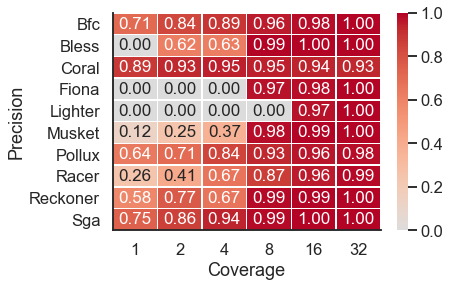

In [22]:
result = data_best.pivot(index='Tool', columns='Coverage', values='Base Precision') \
    .sort_values(by="Tool", ascending=False)

sns.set_style("white")
sns.set_context("talk")

g=sns.heatmap(result, 
              annot=True, 
              cmap='coolwarm',
              center=0,
              linewidths=.5,
              annot_kws={'size':17},
              fmt=".2f",
              vmax=1.0)

colorbar.set_ticks([0, 0.2, 0.4, 0.6, 0.8, 1.0])

g.set(xlabel='Coverage', ylabel='Precision')
g.set_ylim(0, 10)


sns.despine()

plt.savefig("../figures/D1_WGS_E.coli/Fig2h_heatmap_ecoli_precision.png", bbox_inches="tight")
plt.savefig("../figures/D1_WGS_E.coli/Fig2h_heatmap_ecoli_precision.pdf", bbox_inches="tight")

<br>
<br>

# Figure 2i
Heatmap depicting the sensitivity across various coverage settings.<br> 
Each row corresponds to an error correction tool, and each column corresponds to a dataset with a given coverage.
<br>For each tool, the best k-mer size was selected.

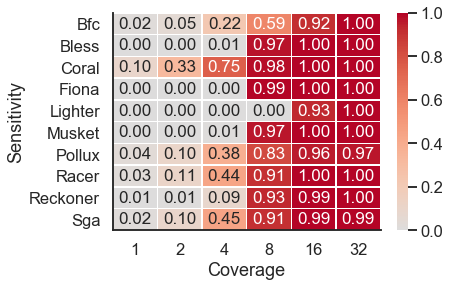

In [23]:
result = data_best.pivot(index='Tool', columns='Coverage', values='Base Sensitivity')\
    .sort_values(by="Tool", ascending=False)

sns.set_style("white")
sns.set_context("talk")

g=sns.heatmap(result, 
              annot=True, 
              cmap='coolwarm',
              center=0,
              linewidths=.5,
              annot_kws={'size':17},
              fmt=".2f",
             vmax=1.0)

g.set(xlabel='Coverage', ylabel='Sensitivity')
g.set_ylim(0, 10)

sns.despine()

plt.savefig("../figures/D1_WGS_E.coli/Fig2i_heatmap_ecoli_sensitivity.png", bbox_inches="tight")
plt.savefig("../figures/D1_WGS_E.coli/Fig2i_heatmap_ecoli_sensitivity.pdf", bbox_inches="tight")

<br>
<br>

# Figure 2j
Scatter plot depicting the number of TP corrections (x-axis) and FP corrections (y-axis) for datasets with 32x coverage. 
<br>For each tool, the best k-mer size was selected.

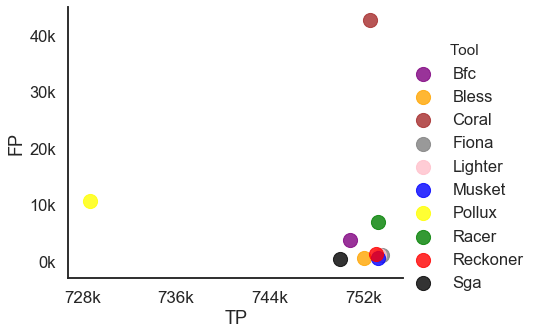

In [24]:
sns.set_style("white")
sns.set_context("talk")

g=sns.lmplot(data=data_best[(data_best['Coverage'] == 32)]
             , x='Base - TP', 
             y='Base - FP', 
             hue='Tool',
             fit_reg=False,
             aspect=1.3,
             scatter_kws={"s": 200},
             palette=color_dict)

for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=17)
    ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: "{:.0f}k".format(x/1000)))
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: "{:.0f}k".format(x/1000)))
    ax.yaxis.set_major_locator(tkr.MultipleLocator(10000))
    ax.xaxis.set_major_locator(tkr.MultipleLocator(8000))

g.set(xlabel='TP', ylabel='FP')

sns.despine()

plt.savefig("../figures/D1_WGS_E.coli/Fig2j_TP_vs_FP.png", bbox_inches="tight")
plt.savefig("../figures/D1_WGS_E.coli/Fig2j_TP_vs_FP.pdf", bbox_inches="tight")

<br>
<br>

# Figure 2k
Scatter plot depicting the number of FP corrections (x-axis) and FN corrections (y-axis) for datasets with 32x
coverage. 
<br>For each tool, the best k-mer size was selected.

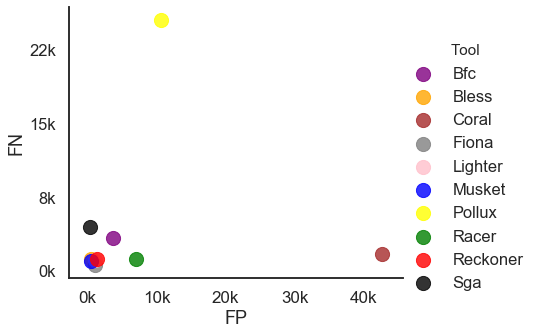

In [25]:
sns.set_style("white")
sns.set_context("talk")

g=sns.lmplot(data=data_best[(data_best['Coverage'] == 32)], 
             x='Base - FP', 
             y='Base - FN', 
             hue='Tool',
             fit_reg=False,
             aspect=1.3,
             scatter_kws={"s": 200},
             palette=color_dict)

for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=17)
    ax.xaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: "{:.0f}k".format(x/1000)))
    ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: "{:.0f}k".format(x/1000)))
    ax.yaxis.set_major_locator(tkr.MultipleLocator(7500))
    ax.xaxis.set_major_locator(tkr.MultipleLocator(10000))
    
g.set(xlabel='FP', ylabel='FN')

sns.despine()

plt.savefig("../figures/D1_WGS_E.coli/Fig2k_FP_vs_FN.png", bbox_inches="tight")
plt.savefig("../figures/D1_WGS_E.coli/Fig2k_FP_vs_FN.pdf", bbox_inches="tight")

<br>
<br>

# Figure 2l
Scatter plot depicting the sensitivity (x-axis) and precision (y-axis) for datasets with 32x coverage. 
<br>For each tool, the best k-mer size was selected.


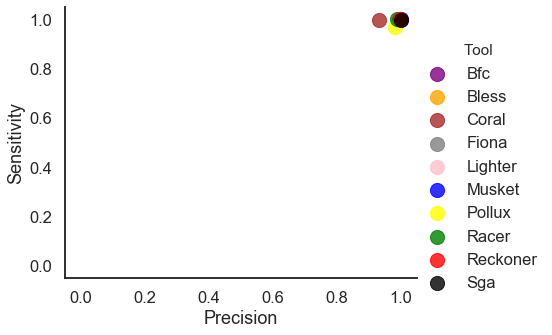

In [26]:
sns.set_style("white")
sns.set_context("talk")

g=sns.lmplot(data=data_best[(data_best['Coverage'] == 32)], 
             x='Base Precision', 
             y='Base Sensitivity', 
             hue='Tool',
             fit_reg=False,
             aspect=1.3,
             scatter_kws={"s": 200},
             palette=color_dict)

g.set(xlabel='Precision', ylabel='Sensitivity')

plt.ylim(-0.05, 1.05)
plt.xlim(-0.05, 1.05)

sns.despine()

plt.savefig("../figures/D1_WGS_E.coli/Fig2l_Precision_vs_Sensitivity.png", bbox_inches="tight")
plt.savefig("../figures/D1_WGS_E.coli/Fig2l_Precision_vs_Sensitivity.pdf", bbox_inches="tight")
